#Classification of IMDB dataset using lstm,gru and conv1d

#Import

In [4]:
import tensorflow as tf 
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

#Load data

In [5]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


#Hyperparameter for the model

In [6]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

In [7]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [8]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

#Bidirectional GRU Model

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [10]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 74s 94ms/step - loss: 0.5526 - accuracy: 0.6943 - val_loss: 0.3675 - val_accuracy: 0.8420
Epoch 2/50
782/782 [==============================] - 73s 93ms/step - loss: 0.3130 - accuracy: 0.8708 - val_loss: 0.3556 - val_accuracy: 0.8437
Epoch 3/50
782/782 [==============================] - 73s 93ms/step - loss: 0.2385 - accuracy: 0.9084 - val_loss: 0.3797 - val_accuracy: 0.8442
Epoch 4/50
782/782 [==============================] - 74s 94ms/step - loss: 0.1866 - accuracy: 0.9310 - val_loss: 0.4101 - val_accuracy: 0.8310
Epoch 5/50
782/782 [==============================] - 74s 95ms/step - loss: 0.1341 - accuracy: 0.9532 - val_loss: 0.4574 - val_accuracy: 0.8270
Epoch 6/50
782/782 [==============================] - 72s 92ms/step - loss: 0.0958 - accuracy: 0.9672 - val_loss: 0.5537 - val_accuracy: 0.8234
Epoch 7/50
782/782 [==============================] - 72s 92ms/step - loss: 0.0615 - accuracy: 0.9799 - val_loss: 0.6997 - val_accuracy:

#Visualization Graph

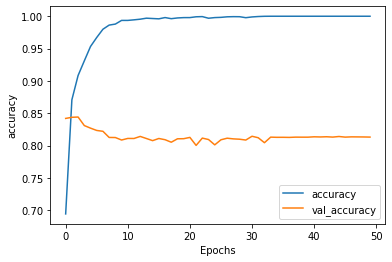

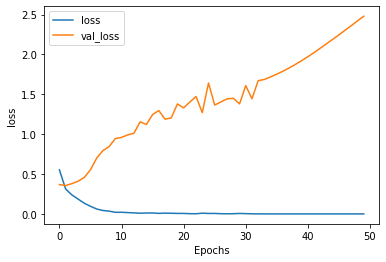

In [11]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model.save("bgru.h5")

#Bidirectional LSTM model

In [12]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 71s 91ms/step - loss: 0.4682 - accuracy: 0.7653 - val_loss: 0.3417 - val_accuracy: 0.8490
Epoch 2/50
782/782 [==============================] - 70s 89ms/step - loss: 0.2916 - accuracy: 0.8828 - val_loss: 0.3450 - val_accuracy: 0.8499
Epoch 3/50
782/782 [==============================] - 71s 91ms/step - loss: 0.2362 - accuracy: 0.9095 - val_loss: 0.3810 - val_accuracy: 0.8394
Epoch 4/50
782/782 [==============================] - 75s 96ms/step - loss: 0.1937 - accuracy: 0.9273 - val_loss: 0.3878 - val_accuracy: 0.8312
Epoch 5/50
782/782 [==============================] - 70s 89ms/step - loss: 0.1543 - accuracy: 0.9441 - val_loss: 0.4491 - val_accuracy: 0.8314
Epoch 6/50
782/782 [==============================] - 70s 89ms/step - loss: 0.1134 - accuracy: 0.9602 - val_loss: 0.5359 - val_accuracy: 0.8267
Epoch 7/50
782/782 [==============================] - 70s 89ms/step - loss: 0.0892 - accuracy: 0.9682 - val_loss: 0.6373 - val_accuracy:

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model.save("blstm.h5")

#Convulution 1D MODEL

In [ ]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

In [ ]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model.save("conv1.h5")

#Written by : SATYAJIT MAITRA
## follow github: https://github.com/MachineLearningWithHuman/
## Email for work : ssatyajitmaitra@gmail.com
##learn with me on youtube: https://www.youtube.com/channel/UCiWd572-4LeH0IqJ5A7LavA/
### please give a star if it helps you 